# 1. Load the dataset

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Firepoints Data

kerala_fire = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/FSI-Firepoints-100625 kerala.csv", encoding='latin1')
# Preview the firepoints data
print("---------------Firepoints data:-----------------")
print(kerala_fire.head())

# Load weather data

kerala_weather = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/KERALA_AWS_IMD_data.csv")
# Previw the weather data
print("----------------Weather data:---------------------")
print(kerala_weather.head())

# Load AWS location

aws_locations = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/All AWS Location 2.csv")
# Preview the aws locations
print("------------------AWS locations:------------------")
print(aws_locations.head())

---------------Firepoints data:-----------------
    Fire Date Fire Time Source      Latitude     Longitude   State District  \
0  2021-12-17  13:42:19   SNPP  11° 40' 15"N  75° 55' 33"E  KERALA   WAYNAD   
1  2021-12-27  13:54:22   SNPP  10° 02' 49"N  77° 02' 17"E  KERALA   IDUKKI   
2  2021-12-30  01:48:19   SNPP  10° 01' 50"N  77° 11' 21"E  KERALA   IDUKKI   
3  2021-12-30  01:48:19   SNPP  10° 02' 02"N  77° 11' 23"E  KERALA   IDUKKI   
4  2021-12-30  01:48:19   SNPP  10° 02' 06"N  77° 10' 58"E  KERALA   IDUKKI   

              Circle                Division            Range  \
0    NORTHERN CIRCLE  WAYANAD SOUTH DIVISION   KALPETTA RANGE   
1  HIGH RANGE CIRCLE         MUNNAR DIVISION  DEVIKULAM RANGE   
2  HIGH RANGE CIRCLE         MUNNAR DIVISION  DEVIKULAM RANGE   
3  HIGH RANGE CIRCLE         MUNNAR DIVISION  DEVIKULAM RANGE   
4  HIGH RANGE CIRCLE         MUNNAR DIVISION  DEVIKULAM RANGE   

   Block/Section/Round  Beat  Forest Block  Compartment No  Unnamed: 14  
0          

/tmp/ipython-input-2169092221.py:17: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  kerala_weather = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/KERALA_AWS_IMD_data.csv")


----------------Weather data:---------------------
   S NO.   DISTRICT    STATION DATE(YYYY-MM-DD) TIME (UTC)  \
0      1  ALAPPUZHA  CHERTHALA       2020-06-23   08:30:00   
1      2  ALAPPUZHA  CHERTHALA       2020-06-23   10:30:00   
2      3  ALAPPUZHA  CHERTHALA       2020-06-23   11:30:00   
3      4  ALAPPUZHA  CHERTHALA       2020-06-23   12:30:00   
4      5  ALAPPUZHA  CHERTHALA       2020-06-23   13:30:00   

   RAIN FALL CUM. SINCE 0300 UTC (mm)  TEMP. ('C)  TEMP DAY MIN. ('C)  \
0                                 0.0         NaN                 NaN   
1                                 0.0        30.4                 NaN   
2                                 0.0        29.4                 NaN   
3                                 0.0        28.4                 NaN   
4                                 0.0        27.5                 NaN   

   TEMP DAY MAX. ('C)  RH (%)  ...  SOIL TEMP 30 cm ('C)  \
0                 NaN     NaN  ...                   NaN   
1                

## 1.1 Select only Kerala AWS location

In [ ]:
# Filter for Kerala state AWS locations
kerala_aws = aws_locations[aws_locations['STATE'].str.upper() == 'KERALA']

# Drop redundant column from kerala_aws
kerala_aws = kerala_aws.drop(columns=['S NO.','STATE','TYPE'])

# Preview the filtered data
print(f"Total AWS stations in Kerala: {len(kerala_aws)}")
print(kerala_aws.head())

Total AWS stations in Kerala: 56
      DISTRICT       STATION  LATITUDE  LONGITUDE  ALTITUDE
879  ALAPPUZHA     ALAPPUZHA      9.49    76.3100       NaN
880  ALAPPUZHA     CHERTHALA      9.62    76.3320      14.0
881  ERNAKULAM    KEERAMPARA     10.10    76.6672       NaN
882  ERNAKULAM  MAVATTUPUZAH      9.99    76.5600       NaN
883  ERNAKULAM   NEELESWARAM     10.18    76.4600       NaN


## 1.2 Load the shape file of Kerala

   ID_0  ISO NAME_0  ID_1  NAME_1 TYPE_1 ENGTYPE_1 NL_NAME_1 VARNAME_1  \
0   105  IND  India    18  Kerala  State     State      None      None   

                                            geometry  
0  MULTIPOLYGON (((76.46736 9.54097, 76.46736 9.5...  


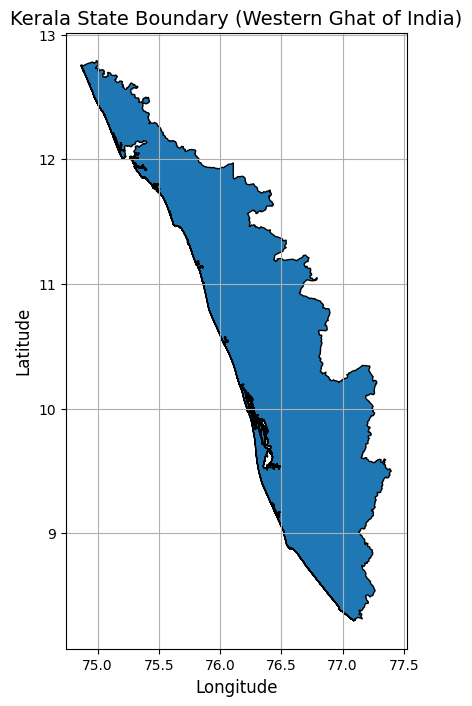

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
protect_area = gpd.read_file("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/StudyArea/Kerala_StateBoundary.shp")

# Preview spatial data
print(protect_area.head())

# Plot with axis labels and title
fig, ax = plt.subplots(figsize=(10, 8))
protect_area.plot(ax=ax, edgecolor='black')

# Add title and axis labels
ax.set_title("Kerala State Boundary (Western Ghat of India)", fontsize=14)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.grid(True)  # Optional: adds gridlines for better readability
plt.show()

# 2. Choose the best location to train the model for Kerala

## 2.1 Check the maximum firepoints in the District of Kerala

In [ ]:
import pandas as pd

fire = kerala_fire.copy()

# Normalize district labels (trim/case); set UNKNOWN for missing if desired
fire['District_norm'] = (
    fire['District']
    .astype(str)
    .str.strip()
    .str.upper()
    .replace({'': pd.NA})
    .fillna('UNKNOWN')
)

# Count rows per district (row count unaffected by NaNs in other cols)
district_counts = (
    fire.groupby('District_norm')
        .size()
        .sort_values(ascending=False)
)

print("Firepoints per District (descending):")
print(district_counts)

Firepoints per District (descending):
District_norm
IDUKKI                1426
PALAKKAD               999
THRISSUR               229
MALAPPURAM             191
WAYNAD                 152
PATHANAMTHITTA         149
KOLLAM                  95
KOTTAYAM                91
THIRUVANANTHAPURAM      37
KANNUR                  25
KOZHIKODE                9
KASARAGOD                4
ERNAKULAM                3
dtype: int64


## 2.2 Check the continous value of data for columns Temp, Rainfall, RH, Wind Speed (10m) per station

In [ ]:
import pandas as pd

# Source DataFrame
df = kerala_weather.copy()

# Exact sample column names from the provided schema
station_col   = 'STATION'
date_col      = 'DATE(YYYY-MM-DD)'
time_col      = 'TIME (UTC)'

# Primary feature columns (edit if dataset differs)
temp_col       = "TEMP. ('C)"
rainfall_col   = 'RAIN FALL CUM. SINCE 0300 UTC (mm)'
rh_col         = 'RH (%)'
wind_speed_col = 'WIND SPEED 10 m (Kt)'  # if absent, fallback resolution is below

# If any expected column is missing, attempt a robust fallback by keywords
def match_col(keywords, cols):
    ks = [k.lower().replace(' ', '') for k in keywords]
    for c in cols:
        s = c.lower().replace(' ', '')
        if all(k in s for k in ks):
            return c
    return None

for need, keys, varname in [
    (temp_col,       ['temp'],                'temp_col'),
    (rainfall_col,   ['rain'],                'rainfall_col'),
    (rh_col,         ['rh'],                  'rh_col'),
    (wind_speed_col, ['wind', 'speed', '10'], 'wind_speed_col'),
]:
    if need not in df.columns:
        fallback = match_col(keys, df.columns)
        if fallback:
            locals()[varname] = fallback

# Build timestamp and sort
df['timestamp'] = pd.to_datetime(
    df[date_col].astype(str).str.strip() + ' ' + df[time_col].astype(str).str.strip(),
    errors='coerce'
)
df = df.dropna(subset=['timestamp']).sort_values([station_col, 'timestamp'])

# Gap-tolerant window finder: longest consecutive-rows interval with <= k missing
def longest_interval_with_at_most_k_missing(mask_missing: pd.Series, k: int = 2):
    left = 0
    miss = 0
    best_len = 0
    best = (0, -1, 0)  # (start_idx, end_idx, missing_count)
    for right in range(len(mask_missing)):
        if mask_missing.iat[right]:
            miss += 1
        while miss > k and left <= right:
            if mask_missing.iat[left]:
                miss -= 1
            left += 1
        cur_len = right - left + 1
        if cur_len > best_len:
            best_len = cur_len
            best = (left, right, miss)
    return best  # left, right, miss

# Parameters
max_missing_inside = 2       # allow up to 2 internal NaNs
preview_rows = 20            # how many rows of values to print (split head/tail if large)

# Columns to evaluate
targets = {
    'Temp': temp_col,
    'Rainfall': rainfall_col,
    'RH': rh_col,
    'Wind Speed (10m)': wind_speed_col,
}

# Per-station reporting
for station, g in df.groupby(station_col, sort=False):
    print(f"\n===== Station: {station} =====")
    g = g.reset_index(drop=True)
    for label, col in targets.items():
        if col is None or col not in g.columns:
            print(f"{label}: column not found; skipped")
            continue

        mask_missing = g[col].isna()
        start_i, end_i, miss_in = longest_interval_with_at_most_k_missing(mask_missing, max_missing_inside)
        if end_i < start_i:
            print(f"{label}: no valid interval found (k={max_missing_inside})")
            continue

        total_len = end_i - start_i + 1
        non_missing = total_len - miss_in
        completeness = 100.0 * non_missing / max(total_len, 1)
        start_ts = g.loc[start_i, 'timestamp']
        end_ts   = g.loc[end_i, 'timestamp']

        print(f"{label}: start={start_ts}, end={end_ts}, rows={total_len}, missing_inside={miss_in}, non_missing={non_missing}, completeness={completeness:.1f}%")

        # Print a compact preview of the actual values in the interval
        # block = g.loc[start_i:end_i, ['timestamp', col]]
        # if len(block) <= preview_rows:
        #     print(block.to_string(index=False))
        # else:
        #     head = block.head(preview_rows // 2)
        #     tail = block.tail(preview_rows - len(head))
        #     print(head.to_string(index=False))
        #     print("... (truncated) ...")
        #     print(tail.to_string(index=False))



===== Station: ADAKKAPUTHUR =====
Temp: start=2022-07-16 03:30:00, end=2024-06-30 23:30:00, rows=15475, missing_inside=2, non_missing=15473, completeness=100.0%
Rainfall: start=2022-07-15 20:30:00, end=2024-06-30 23:30:00, rows=15482, missing_inside=2, non_missing=15480, completeness=100.0%
RH: start=2022-07-16 03:30:00, end=2024-06-30 23:30:00, rows=15475, missing_inside=2, non_missing=15473, completeness=100.0%
Wind Speed (10m): start=2022-07-15 20:30:00, end=2024-06-30 23:30:00, rows=15482, missing_inside=2, non_missing=15480, completeness=100.0%

===== Station: ALUVA =====
Temp: start=2022-06-21 13:30:00, end=2024-06-30 23:30:00, rows=15575, missing_inside=0, non_missing=15575, completeness=100.0%
Rainfall: start=2022-06-21 13:30:00, end=2024-06-30 23:30:00, rows=15575, missing_inside=0, non_missing=15575, completeness=100.0%
RH: start=2022-06-21 13:30:00, end=2024-06-30 23:30:00, rows=15575, missing_inside=0, non_missing=15575, completeness=100.0%
Wind Speed (10m): start=2022-06-

*After reviewing both dataset we will chosse Idukki district and Peermade station from date 14 december 2022 to 22 nov 2023*

## 2.2 Drop redundant columns of kerala_weather and trim to the useful date

In [ ]:
import pandas as pd

# Copy source
df = kerala_weather.copy()

# Columns
date_col = 'DATE(YYYY-MM-DD)'
station_col = 'STATION'

# Normalize District and build date range
station_target = 'PEERMADE'  # normalized target
df['_STATION_NORM'] = df[station_col].astype(str).str.strip().str.upper()

# Parse the date column to datetime (assumes DATE(YYYY-MM-DD) is a calendar date)
df['_DATE'] = pd.to_datetime(df[date_col], errors='coerce')

# Define inclusive date range (provided in dd-mm-yyyy)
start = pd.to_datetime('14-12-2022', dayfirst=True)
end   = pd.to_datetime('22-11-2023', dayfirst=True)

# Build mask and filter
mask = (df['_STATION_NORM'].eq(station_target)) & (df['_DATE'].between(start, end, inclusive='both'))
kerala_weather_trimmed = df.loc[mask].drop(columns=['_STATION_NORM']).copy()

useful_cols = [
    'DISTRICT',
    'STATION',
    'DATE(YYYY-MM-DD)',
    'TIME (UTC)',
    'RAIN FALL CUM. SINCE 0300 UTC (mm)',
    "TEMP. ('C)",
    'RH (%)',
    'WIND SPEED 10 m (Kt)',
]

clean_kerala_weather = kerala_weather_trimmed[useful_cols].copy()


# Optional: quick sanity checks
print(clean_kerala_weather.shape)
print(clean_kerala_weather.head())

(7739, 8)
       DISTRICT   STATION DATE(YYYY-MM-DD) TIME (UTC)  \
370176   IDUKKI  PEERMADE       2022-12-14   00:30:00   
370177   IDUKKI  PEERMADE       2022-12-14   01:30:00   
370178   IDUKKI  PEERMADE       2022-12-14   02:30:00   
370179   IDUKKI  PEERMADE       2022-12-14   03:30:00   
370180   IDUKKI  PEERMADE       2022-12-14   04:30:00   

        RAIN FALL CUM. SINCE 0300 UTC (mm)  TEMP. ('C)  RH (%)  \
370176                                 2.5        18.9    99.0   
370177                                 2.5        19.1    97.0   
370178                                 2.5        19.5    95.0   
370179                                 0.0        20.3    91.0   
370180                                 0.0        20.7    90.0   

        WIND SPEED 10 m (Kt)  
370176                   3.0  
370177                   4.0  
370178                   6.0  
370179                   8.0  
370180                   6.0  


### 2.2.1 Check the starting and ending date with time of clean_kerala_weather

In [ ]:
import pandas as pd

df = clean_kerala_weather.copy()

# Start/end by calendar date
df['_DATE'] = pd.to_datetime(df['DATE(YYYY-MM-DD)'], errors='coerce')
start_date = df['_DATE'].min()
end_date   = df['_DATE'].max()

print("Start date (by DATE):", start_date.date() if pd.notna(start_date) else None)
print("End date   (by DATE):", end_date.date() if pd.notna(end_date) else None)

# Optional: exact earliest/latest by timestamp (DATE + TIME)
df['_TS'] = pd.to_datetime(
    df['DATE(YYYY-MM-DD)'].astype(str) + ' ' + df['TIME (UTC)'].astype(str),
    errors='coerce'
)
start_ts = df['_TS'].min()
end_ts   = df['_TS'].max()

print("Earliest timestamp (DATE+TIME):", start_ts)
print("Latest   timestamp (DATE+TIME):", end_ts)


Start date (by DATE): 2022-12-14
End date   (by DATE): 2023-11-22
Earliest timestamp (DATE+TIME): 2022-12-14 00:30:00
Latest   timestamp (DATE+TIME): 2023-11-22 23:30:00


## 2.3 Trim the kerala_fire data with Idukki district and useful date and drop the redundant columns

In [ ]:
import pandas as pd

fire = kerala_fire.copy()

# Normalize district labels for robust match
fire['_DISTRICT_NORM'] = fire['District'].astype(str).str.strip().str.upper()  # trims spaces and uppercases [10][13]

# Parse Fire Date as datetime
fire['_DATE'] = pd.to_datetime(fire['Fire Date'], errors='coerce')  # convert to datetime for reliable comparison [1]

# Define inclusive date range from dd-mm-yyyy endpoints
start = pd.to_datetime('15-02-2023', dayfirst=True)  # interpret day first [1]
end   = pd.to_datetime('21-11-2023', dayfirst=True)  # interpret day first [1]

# Build mask and filter
mask = (fire['_DISTRICT_NORM'].eq('IDUKKI')) & (fire['_DATE'].between(start, end, inclusive='both'))  # inclusive range [6]
kerala_fire_trimmed = fire.loc[mask].drop(columns=['_DISTRICT_NORM', '_DATE']).copy()

useful_columns = [
    'Fire Date',
    'Fire Time',
    'Latitude',
    'Longitude',
    'District'
]

clean_kerala_fire = kerala_fire_trimmed[useful_columns].copy()

# Optional sanity checks
print(clean_kerala_fire.shape)  # rows, cols after trim [1]
print(clean_kerala_fire.head())  # should show only IDUKKI variants [10]


(231, 5)
      Fire Date Fire Time      Latitude     Longitude District
868  2023-02-15  01:24:04  09° 37' 26"N  77° 00' 26"E   IDUKKI
869  2023-02-15  01:24:04  10° 12' 01"N  77° 14' 42"E   IDUKKI
870  2023-02-15  01:24:04  10° 12' 01"N  77° 14' 42"E   IDUKKI
871  2023-02-15  14:14:21  09° 42' 57"N  76° 55' 23"E   IDUKKI
872  2023-02-15  14:14:21  09° 55' 20"N  76° 56' 17"E   IDUKKI


### 2.3.1 Check the starting and ending date with time of clean_kerala_fire

In [ ]:
import pandas as pd

df = clean_kerala_fire.copy()

# Start/end by calendar date
df['_DATE'] = pd.to_datetime(df['Fire Date'], errors='coerce')
start_date = df['_DATE'].min()
end_date   = df['_DATE'].max()

print("Start date (by DATE):", start_date.date() if pd.notna(start_date) else None)
print("End date   (by DATE):", end_date.date() if pd.notna(end_date) else None)

# Optional: exact earliest/latest by timestamp (DATE + TIME)
df['_TS'] = pd.to_datetime(
    df['Fire Date'].astype(str) + ' ' + df['Fire Time'].astype(str),
    errors='coerce'
)
start_ts = df['_TS'].min()
end_ts   = df['_TS'].max()

print("Earliest timestamp (DATE+TIME):", start_ts)
print("Latest   timestamp (DATE+TIME):", end_ts)

Start date (by DATE): 2023-02-15
End date   (by DATE): 2023-05-28
Earliest timestamp (DATE+TIME): 2023-02-15 01:24:04
Latest   timestamp (DATE+TIME): 2023-05-28 01:11:30


### 2.3.2 Renaming the lat long columns of FSI and AWS:

In [ ]:
# Rename columns in FSI dataset
clean_kerala_fire = clean_kerala_fire.rename(columns={
    'Latitude': 'Lat_FSI',
    'Longitude': 'Long_FSI'
})

# Rename columns in AWS dataset
kerala_aws = kerala_aws.rename(columns={
    'LATITUDE': 'Lat_AWS',
    'LONGITUDE': 'Long_AWS'
})

print(clean_kerala_fire.head())
print(kerala_aws.columns)

      Fire Date Fire Time       Lat_FSI      Long_FSI District
868  2023-02-15  01:24:04  09° 37' 26"N  77° 00' 26"E   IDUKKI
869  2023-02-15  01:24:04  10° 12' 01"N  77° 14' 42"E   IDUKKI
870  2023-02-15  01:24:04  10° 12' 01"N  77° 14' 42"E   IDUKKI
871  2023-02-15  14:14:21  09° 42' 57"N  76° 55' 23"E   IDUKKI
872  2023-02-15  14:14:21  09° 55' 20"N  76° 56' 17"E   IDUKKI
Index(['DISTRICT', 'STATION', 'Lat_AWS', 'Long_AWS', 'ALTITUDE'], dtype='object')


# 3. Merge the clean_kerala_fire and clean_kerala_weather according to date and time with OneHotEncoded

## 3.1 Merge clean_kerala_weather and kerala_aws

In [ ]:
import pandas as pd

aws = kerala_aws.copy()
wx  = clean_kerala_weather.copy()

# Normalize join keys: trim, collapse internal spaces, uppercase
def norm_key(s: pd.Series) -> pd.Series:
    return (
        s.astype(str)
         .str.strip()
         .str.replace(r"\s+", " ", regex=True)  # collapse multiple spaces [10]
         .str.upper()
    )

aws['_DISTRICT_KEY'] = norm_key(aws['DISTRICT'])
aws['_STATION_KEY']  = norm_key(aws['STATION'])

wx['_DISTRICT_KEY'] = norm_key(wx['DISTRICT'])
wx['_STATION_KEY']  = norm_key(wx['STATION'])

# Select only needed columns from aws for merge
aws_key_cols = ['_DISTRICT_KEY', '_STATION_KEY', 'Lat_AWS', 'Long_AWS', 'ALTITUDE']

# Left-merge so all weather rows are retained; coordinates added when keys match
merged_kerala_weather_aws = wx.merge(
    aws[aws_key_cols],
    how='left',
    left_on=['_DISTRICT_KEY', '_STATION_KEY'],
    right_on=['_DISTRICT_KEY', '_STATION_KEY'],
    copy=False,
)

# Drop helper keys (optional keep if useful for debugging)
merged_kerala_weather_aws = merged_kerala_weather_aws.drop(columns=['_DISTRICT_KEY', '_STATION_KEY'])
print(merged_kerala_weather_aws)

     DISTRICT   STATION DATE(YYYY-MM-DD) TIME (UTC)  \
0      IDUKKI  PEERMADE       2022-12-14   00:30:00   
1      IDUKKI  PEERMADE       2022-12-14   01:30:00   
2      IDUKKI  PEERMADE       2022-12-14   02:30:00   
3      IDUKKI  PEERMADE       2022-12-14   03:30:00   
4      IDUKKI  PEERMADE       2022-12-14   04:30:00   
...       ...       ...              ...        ...   
7734   IDUKKI  PEERMADE       2023-11-22   19:30:00   
7735   IDUKKI  PEERMADE       2023-11-22   20:30:00   
7736   IDUKKI  PEERMADE       2023-11-22   21:30:00   
7737   IDUKKI  PEERMADE       2023-11-22   22:30:00   
7738   IDUKKI  PEERMADE       2023-11-22   23:30:00   

      RAIN FALL CUM. SINCE 0300 UTC (mm)  TEMP. ('C)  RH (%)  \
0                                    2.5        18.9    99.0   
1                                    2.5        19.1    97.0   
2                                    2.5        19.5    95.0   
3                                    0.0        20.3    91.0   
4                  

## 3.2 Deduplicate clean_kerala_fire by exact Fire Date+Time per district and add a fire_count column

In [ ]:
import pandas as pd

fire = clean_kerala_fire.copy()

# Exact timestamp key
fire['FIRE_TS'] = pd.to_datetime(
    fire['Fire Date'].astype(str) + ' ' + fire['Fire Time'].astype(str),
    errors='coerce'
)  # exact timestamp per row [21]

# Preserve original file order explicitly
fire['_ROW_NO'] = range(len(fire))
fire = fire.sort_values(['FIRE_TS', '_ROW_NO'], kind='mergesort')  # stable sort keeps first-by-file-order within ties [13][10]

# Choose which coordinate columns to keep from the first row
lat_col = 'Lat_FSI' if 'Lat_FSI' in fire.columns else ('Latitude' if 'Latitude' in fire.columns else None)
lon_col = 'Long_FSI' if 'Long_FSI' in fire.columns else ('Longitude' if 'Longitude' in fire.columns else None)

# 1) Keep the first row for each exact timestamp (first-by-file-order) to carry lat/lon
first_rows = (
    fire.dropna(subset=['FIRE_TS'])
        .drop_duplicates(subset=['FIRE_TS'], keep='first')  # keep the first occurrence only [1][8]
)

# 2) Count how many rows share the same exact timestamp
counts = (
    fire.dropna(subset=['FIRE_TS'])
        .groupby('FIRE_TS')
        .size()
        .rename('fire_count')
        .reset_index()
)  # row counts per exact timestamp [18][12]

# 3) Merge counts back to the kept-first rows
clean_kerala_fire = first_rows.merge(counts, on='FIRE_TS', how='left')

# 4) Keep only the useful columns
keep_cols = ['FIRE_TS', 'fire_count', 'District']
if lat_col: keep_cols.append(lat_col)
if lon_col: keep_cols.append(lon_col)
clean_kerala_fire = clean_kerala_fire[keep_cols].copy()

# 5) Standardize coordinate column names as Lat_FSI/Long_FSI (purely for downstream consistency)
if lat_col and lat_col != 'Lat_FSI':
    clean_kerala_fire = clean_kerala_fire.rename(columns={lat_col: 'Lat_FSI'})
if lon_col and lon_col != 'Long_FSI':
    clean_kerala_fire = clean_kerala_fire.rename(columns={lon_col: 'Long_FSI'})

# Optional display-friendly columns
clean_kerala_fire['Fire Date'] = clean_kerala_fire['FIRE_TS'].dt.date
clean_kerala_fire['Fire Time'] = clean_kerala_fire['FIRE_TS'].dt.time

print(clean_kerala_fire.head())
print("Unique exact-time rows:", len(clean_kerala_fire))
print("Sum of fire_count:", int(clean_kerala_fire['fire_count'].sum()))


              FIRE_TS  fire_count District       Lat_FSI      Long_FSI  \
0 2023-02-15 01:24:04           3   IDUKKI  09° 37' 26"N  77° 00' 26"E   
1 2023-02-15 14:14:21           9   IDUKKI  09° 42' 57"N  76° 55' 23"E   
2 2023-02-16 02:45:26           2   IDUKKI  10° 02' 02"N  77° 05' 16"E   
3 2023-02-16 13:55:26           5   IDUKKI  09° 31' 07"N  77° 00' 30"E   
4 2023-02-17 02:26:31           4   IDUKKI  09° 36' 25"N  77° 01' 33"E   

    Fire Date Fire Time  
0  2023-02-15  01:24:04  
1  2023-02-15  14:14:21  
2  2023-02-16  02:45:26  
3  2023-02-16  13:55:26  
4  2023-02-17  02:26:31  
Unique exact-time rows: 51
Sum of fire_count: 231


## 3.3 Merge clean_kerala_fire and merged_kerala_weather_aws

In [ ]:
import pandas as pd

# Copies
wx = merged_kerala_weather_aws.copy()
fc = clean_kerala_fire.copy()

# Normalize district keys (trim + uppercase) for robust joining
wx['_DISTRICT_KEY'] = wx['DISTRICT'].astype(str).str.strip().str.upper()
fc['_DISTRICT_KEY'] = fc['District'].astype(str).str.strip().str.upper()

# Weather timestamp (ensure present)
wx['WX_TS'] = pd.to_datetime(
    wx['DATE(YYYY-MM-DD)'].astype(str) + ' ' + wx['TIME (UTC)'].astype(str),
    errors='coerce'
)

# Anchor fire times to nearest :30 to match weather grid (e.g., 14:14:21 -> 14:30:00)
anchor = pd.Timedelta(minutes=30)
fc['FIRE_TS_ANCHORED'] = (pd.to_datetime(fc['FIRE_TS'], errors='coerce') - anchor).dt.round('60min') + anchor

# Keep only the fields to merge from fire counts
fire_keys = ['_DISTRICT_KEY', 'FIRE_TS_ANCHORED', 'fire_count']
if 'Lat_FSI' in fc.columns: fire_keys.append('Lat_FSI')
if 'Long_FSI' in fc.columns: fire_keys.append('Long_FSI')

fc_merge = fc[fire_keys].dropna(subset=['FIRE_TS_ANCHORED'])

# Merge: left join weather with fire slots on (district, timestamp)
merged_kerala_fire_weather_aws = wx.merge(
    fc_merge,
    how='left',
    left_on=['_DISTRICT_KEY', 'WX_TS'],
    right_on=['_DISTRICT_KEY', 'FIRE_TS_ANCHORED'],
    copy=False
)

# Create binary indicator and tidy
merged_kerala_fire_weather_aws['fire_occurrence'] = (merged_kerala_fire_weather_aws['fire_count'].notna()).astype('int8')
merged_kerala_fire_weather_aws['fire_count'] = merged_kerala_fire_weather_aws['fire_count'].fillna(0).astype('int16')

# Drop helper columns
drop_cols = ['_DISTRICT_KEY', 'FIRE_TS_ANCHORED']
merged_kerala_fire_weather_aws = merged_kerala_fire_weather_aws.drop(columns=[c for c in drop_cols if c in merged_kerala_fire_weather_aws.columns])

# Optional sanity checks
print("Slots with fire (fire_occurrence==1):", int((merged_kerala_fire_weather_aws['fire_occurrence'] == 1).sum()))
print(merged_kerala_fire_weather_aws
      .filter(['DISTRICT','STATION','DATE(YYYY-MM-DD)','TIME (UTC)','fire_occurrence','fire_count','Lat_FSI','Long_FSI'])
      .head())


Slots with fire (fire_occurrence==1): 50
  DISTRICT   STATION DATE(YYYY-MM-DD) TIME (UTC)  fire_occurrence  fire_count  \
0   IDUKKI  PEERMADE       2022-12-14   00:30:00                0           0   
1   IDUKKI  PEERMADE       2022-12-14   01:30:00                0           0   
2   IDUKKI  PEERMADE       2022-12-14   02:30:00                0           0   
3   IDUKKI  PEERMADE       2022-12-14   03:30:00                0           0   
4   IDUKKI  PEERMADE       2022-12-14   04:30:00                0           0   

  Lat_FSI Long_FSI  
0     NaN      NaN  
1     NaN      NaN  
2     NaN      NaN  
3     NaN      NaN  
4     NaN      NaN  


In [ ]:
print(merged_kerala_fire_weather_aws.head())

  DISTRICT   STATION DATE(YYYY-MM-DD) TIME (UTC)  \
0   IDUKKI  PEERMADE       2022-12-14   00:30:00   
1   IDUKKI  PEERMADE       2022-12-14   01:30:00   
2   IDUKKI  PEERMADE       2022-12-14   02:30:00   
3   IDUKKI  PEERMADE       2022-12-14   03:30:00   
4   IDUKKI  PEERMADE       2022-12-14   04:30:00   

   RAIN FALL CUM. SINCE 0300 UTC (mm)  TEMP. ('C)  RH (%)  \
0                                 2.5        18.9    99.0   
1                                 2.5        19.1    97.0   
2                                 2.5        19.5    95.0   
3                                 0.0        20.3    91.0   
4                                 0.0        20.7    90.0   

   WIND SPEED 10 m (Kt)  Lat_AWS  Long_AWS  ALTITUDE               WX_TS  \
0                   3.0    9.573    76.991    1018.0 2022-12-14 00:30:00   
1                   4.0    9.573    76.991    1018.0 2022-12-14 01:30:00   
2                   6.0    9.573    76.991    1018.0 2022-12-14 02:30:00   
3               

## 3.4 Changing coordinates of Lat_FSI and Long_FSI

In [ ]:
import re
import numpy as np
import pandas as pd

df = merged_kerala_fire_weather_aws.copy()

# If AWS coordinates are under different names, normalize them once
rename_map = {}
if 'LATITUDE' in df.columns and 'Lat_AWS' not in df.columns:
    rename_map['LATITUDE'] = 'Lat_AWS'
if 'LONGITUDE' in df.columns and 'Long_AWS' not in df.columns:
    rename_map['LONGITUDE'] = 'Long_AWS'
if rename_map:
    df = df.rename(columns=rename_map)

# Robust DMS -> decimal converter
def dms_to_dd(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    # Normalize common unicode/symbol variations
    s = (s.replace('Â°', '°')
           .replace('º', '°')
           .replace('’', "'").replace('′', "'")
           .replace('”', '"').replace('″', '"'))
    # A permissive regex: deg sep min sep sec + optional direction
    m = re.search(r'([+-]?\d+)[^\d]+(\d+)[^\d]+(\d+(?:\.\d+)?)(?:\s*([NSEWnsew]))?', s)
    if not m:
        # Fallback: split by non-alnum, take first 3 numbers + optional direction
        parts = re.split(r'[^\d\w\.]+', s)
        parts = [p for p in parts if p]
        if len(parts) < 3:
            return np.nan
        deg, minute, sec = parts[0], parts[1], parts[2]
        dirc = parts[3] if len(parts) >= 4 else ''
    else:
        deg, minute, sec, dirc = m.groups()

    dd = float(deg) + float(minute)/60.0 + float(sec)/3600.0
    if str(dirc).upper() in ('S', 'W'):
        dd = -dd
    return dd

# Build numeric fire coordinates alongside the originals
for src, out in [('Lat_FSI', 'Lat_FSI_dd'), ('Long_FSI', 'Long_FSI_dd')]:
    if src in df.columns:
        # First try direct numeric coercion (in case they already are decimal)
        num = pd.to_numeric(df[src], errors='coerce')
        # Where coercion failed, parse DMS
        need_parse = num.isna() & df[src].notna()
        num.loc[need_parse] = df.loc[need_parse, src].apply(dms_to_dd)
        df[out] = num.astype('float64')
    else:
        df[out] = np.nan

# Ensure AWS coordinates are numeric floats
for src in ['Lat_AWS', 'Long_AWS']:
    if src in df.columns:
        df[src] = pd.to_numeric(df[src], errors='coerce').astype('float64')

# OPTIONAL: overwrite original fire coordinate columns with decimal degrees for model use
# If you prefer to replace in-place instead of keeping *_dd copies, uncomment:
df['Lat_FSI']  = df['Lat_FSI_dd']
df['Long_FSI'] = df['Long_FSI_dd']

# Drop redundant column from kerala_aws
df = df.drop(columns=['Lat_FSI_dd','Long_FSI_dd'])

# Save to CSV
df.to_csv('KeralaFireWeatherAWS_merged.csv', index=False, float_format='%.6f')

In [ ]:
print(df.head())

  DISTRICT   STATION DATE(YYYY-MM-DD) TIME (UTC)  \
0   IDUKKI  PEERMADE       2022-12-14   00:30:00   
1   IDUKKI  PEERMADE       2022-12-14   01:30:00   
2   IDUKKI  PEERMADE       2022-12-14   02:30:00   
3   IDUKKI  PEERMADE       2022-12-14   03:30:00   
4   IDUKKI  PEERMADE       2022-12-14   04:30:00   

   RAIN FALL CUM. SINCE 0300 UTC (mm)  TEMP. ('C)  RH (%)  \
0                                 2.5        18.9    99.0   
1                                 2.5        19.1    97.0   
2                                 2.5        19.5    95.0   
3                                 0.0        20.3    91.0   
4                                 0.0        20.7    90.0   

   WIND SPEED 10 m (Kt)  Lat_AWS  Long_AWS  ALTITUDE               WX_TS  \
0                   3.0    9.573    76.991    1018.0 2022-12-14 00:30:00   
1                   4.0    9.573    76.991    1018.0 2022-12-14 01:30:00   
2                   6.0    9.573    76.991    1018.0 2022-12-14 02:30:00   
3               